<a href="https://colab.research.google.com/github/2019mohamed/Topic-Modeling/blob/main/Gensim__LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=119e550867919a0c71cb6951f2824a2fe5a6e81250ec52950a23582f60d27d03
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [1]:
import pandas as pd
import numpy as np

In [6]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [23]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

In [2]:
corpus = pd.read_csv('/content/drive/MyDrive/corpus.csv')

In [3]:
docs = corpus['text']
docs

0       stabl coordin variabl overground walk run pref...
1       weak hip strength increas dynam knee valgus si...
2       current futur project amyotroph later sclerosi...
3       dispar asian nonasian thrombolyz acut ischem s...
4       matern factor predict loss followup newborn he...
                              ...                        
4994    mind differ diagnosi hospit characterist influ...
4995    ethic die deciph pandemicresult pressur influe...
4996    research adolesc regard indirect effect depres...
4997    preintervent effect communitybas intervent tar...
4998    pharmacist role older adult medic regimen comp...
Name: text, Length: 4999, dtype: object

In [9]:
train_docs = docs[:3000,].tolist()
train_docs

['stabl coordin variabl overground walk run prefer fix speed coordin variabl common analyz understand dynam qualiti human locomot purpos studi develop guidelin number trial requir inform calcul stabl mean lower limb overground locomot threedimension lower limb kinemat captur recreat runner perform trial prefer fix speed walk run stanc phase calcul segment joint coupl use modifi vector code techniqu number trial requir achiev mean within stride averag determin coupl individu statist output mode walk run speed prefer fix compar inform differ number trial minimum trial requir stabl mean stanc phase fewer trial underestim led oversight signific differ mode speed futur overground locomot research healthi popul use vector code approach use trial standard minimum research awar notabl consequ insuffici number trial overal studi find',
 'weak hip strength increas dynam knee valgus singleleg task collegi femal athlet clinic scenario dynam knee valgus dkv mechan alter knee lead increas risk injur

In [10]:
test_docs = docs[3000:,].tolist()
test_docs

['new semifossori snake genus arrhyton squamata dipsadida eastern cuba taxonom comment speci genus arrhyton endem cuba eight current known speci new speci arrhyton albicollum novemb describ karst area gibara holgun provinc new speci close relat redimitum anoth eastern speci accord morpholog molecular phylogeni differ speci genus conspicu white nuchal band contrast black pattern head graycolor bodi faint stripe high number ventral subcaud scale addit comment speci includ new local record inform morpholog relationship',
 'two new speci bimasto oligochaeta lumbricida southern appalachian mountain north america two new speci bimasto moor describ base morpholog molecular data bimasto nana resembl lawrencea fender zeteki smith gittin welchi smith bimasto nana differ speci posit clitellum size number posit thicken septum bimasto magnum similar schwerti csuzdi chang palustri moor fulli annular clitellum male pore huge porophor bimasto magnum differ speci posterior posit clitellum xxivxxxiii xx

In [12]:
train_docs = [t.split(' ') for t in train_docs]
test_docs = [t.split(' ') for t in test_docs]

Create the Dictionary and Corpus needed for Topic Modeling


In [15]:
id2word = corpora.Dictionary(train_docs)

Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.

This is used as the input by the LDA model.

In [16]:
corpus = [id2word.doc2bow(text) for text in train_docs]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 3), (32, 2), (33, 3), (34, 2), (35, 2), (36, 1), (37, 1), (38, 4), (39, 1), (40, 1), (41, 3), (42, 1), (43, 1), (44, 2), (45, 1), (46, 3), (47, 1), (48, 1), (49, 1), (50, 3), (51, 2), (52, 3), (53, 1), (54, 1), (55, 1), (56, 4), (57, 3), (58, 2), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 8), (66, 1), (67, 1), (68, 3), (69, 2), (70, 2), (71, 3), (72, 1)]]


 Building the Topic Model

In [17]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
lda_model.print_topics()

[(0,
  '0.021*"group" + 0.011*"bone" + 0.011*"surgeri" + 0.010*"postop" + 0.010*"muscl" + 0.009*"surgic" + 0.008*"diet" + 0.007*"rat" + 0.006*"signific" + 0.006*"effect"'),
 (1,
  '0.029*"cell" + 0.016*"express" + 0.013*"activ" + 0.008*"gene" + 0.008*"protein" + 0.008*"function" + 0.008*"role" + 0.007*"network" + 0.007*"respons" + 0.007*"human"'),
 (2,
  '0.028*"speci" + 0.013*"genus" + 0.007*"protein" + 0.007*"sequenc" + 0.007*"strain" + 0.007*"dna" + 0.006*"feed" + 0.006*"genom" + 0.006*"gene" + 0.006*"known"'),
 (3,
  '0.022*"associ" + 0.020*"studi" + 0.020*"covid" + 0.016*"age" + 0.013*"factor" + 0.013*"risk" + 0.011*"level" + 0.011*"among" + 0.010*"use" + 0.010*"score"'),
 (4,
  '0.057*"patient" + 0.019*"diseas" + 0.013*"case" + 0.012*"clinic" + 0.011*"cancer" + 0.010*"infect" + 0.009*"sever" + 0.009*"treatment" + 0.008*"diagnosi" + 0.008*"mortal"'),
 (5,
  '0.019*"child" + 0.015*"patient" + 0.013*"group" + 0.013*"year" + 0.012*"particip" + 0.011*"studi" + 0.011*"trial" + 0.010*"c

In [20]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=train_docs, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.316257546221708

Coherence Score:  0.4406005484940021


In [25]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.149853  0.103551       1        1  21.389182
7     -0.132988  0.145267       2        1  17.792328
4     -0.109617 -0.102339       3        1  11.063892
1      0.052255  0.180645       4        1  10.170384
3     -0.153546 -0.077570       5        1   9.898525
8      0.042986  0.143110       6        1   8.868208
5     -0.156150 -0.174893       7        1   8.053456
2      0.204821  0.091285       8        1   5.382487
0      0.121166 -0.231167       9        1   4.474459
9      0.280925 -0.077888      10        1   2.907080, topic_info=          Term         Freq        Total Category  logprob  loglift
182    patient  3627.000000  3627.000000  Default  30.0000  30.0000
425       cell  1253.000000  1253.000000  Default  29.0000  29.0000
1019     covid  1623.000000  1623.000000  Default  28.0000  28.0000
240      group  1771.000000  1771.000000  Default  27.0000  27.0000
2025     speci   711.000000   711.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
961   structur    56.754277   466.075522  Topic10  -5.3705   1.4324
3257     match    39.092825   121.576905  Topic10  -5.7432   2.4034
280     region    45.182188   359.737084  Topic10  -5.5985   1.4634
896      learn    41.147600   213.088814  Topic10  -5.6920   1.8935
680       area    34.040441   319.540628  Topic10  -5.8816   1.2987

[614 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5033     10  0.965462  absorpt
3482      6  0.193371    abund
3482      8  0.787296    abund
359       2  0.994927   access
410       1  0.995440    accur
...     ...       ...      ...
207       1  0.095966     year
207       2  0.014764     year
207       3  0.205774     year
207       5  0.269444     year
207       7  0.414317     year

[1152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 5, 2, 4, 9, 6, 3, 1, 10])

How to find the optimal number of topics for LDA?

In [45]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [46]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=train_docs, start=5, limit=20, step=1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

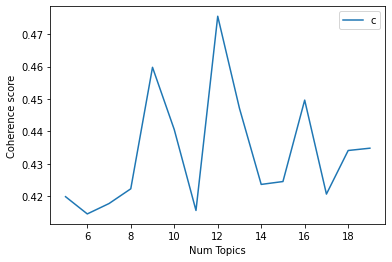

In [47]:
# Show graph
limit=20; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [48]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.4199
Num Topics = 6  has Coherence Value of 0.4146
Num Topics = 7  has Coherence Value of 0.4178
Num Topics = 8  has Coherence Value of 0.4223
Num Topics = 9  has Coherence Value of 0.4598
Num Topics = 10  has Coherence Value of 0.4406
Num Topics = 11  has Coherence Value of 0.4157
Num Topics = 12  has Coherence Value of 0.4755
Num Topics = 13  has Coherence Value of 0.4471
Num Topics = 14  has Coherence Value of 0.4237
Num Topics = 15  has Coherence Value of 0.4246
Num Topics = 16  has Coherence Value of 0.4497
Num Topics = 17  has Coherence Value of 0.4207
Num Topics = 18  has Coherence Value of 0.4341
Num Topics = 19  has Coherence Value of 0.4349


Here, the number of topics is 12. Clearly, the CVs are approxmatly equal.

In [49]:
coherence_values = np.array(coherence_values)
max_index = np.argmax(coherence_values)
max_index

7

In [50]:
ideal_lda = model_list[max_index]

In [51]:
ideal_lda.print_topics()

[(0,
  '0.013*"surgeri" + 0.012*"bone" + 0.011*"postop" + 0.011*"muscl" + 0.011*"surgic" + 0.011*"case" + 0.007*"liver" + 0.007*"complic" + 0.006*"injuri" + 0.006*"pain"'),
 (1,
  '0.039*"cell" + 0.025*"express" + 0.011*"network" + 0.011*"activ" + 0.009*"human" + 0.008*"level" + 0.008*"diseas" + 0.008*"function" + 0.007*"role" + 0.007*"tissu"'),
 (2,
  '0.017*"protein" + 0.012*"gene" + 0.010*"strain" + 0.010*"molecular" + 0.010*"structur" + 0.010*"compound" + 0.009*"dna" + 0.008*"activ" + 0.007*"sequenc" + 0.007*"interact"'),
 (3,
  '0.024*"associ" + 0.022*"studi" + 0.021*"age" + 0.016*"factor" + 0.016*"risk" + 0.015*"child" + 0.014*"among" + 0.012*"woman" + 0.012*"year" + 0.012*"use"'),
 (4,
  '0.032*"cancer" + 0.014*"tumor" + 0.013*"lung" + 0.012*"cell" + 0.012*"surviv" + 0.012*"therapi" + 0.010*"patient" + 0.010*"treatment" + 0.010*"breast" + 0.008*"mutat"'),
 (5,
  '0.016*"eye" + 0.015*"physician" + 0.012*"heart" + 0.011*"cardiac" + 0.008*"sensor" + 0.007*"coronari" + 0.007*"chest"

In [52]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ideal_lda, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.206316  0.028061       1        1  20.761685
7     -0.178429 -0.028302       2        1  14.252196
10    -0.168119 -0.131835       3        1  13.416589
3     -0.159704 -0.084130       4        1  10.863499
8     -0.052128  0.137438       5        1   8.143107
11    -0.039725 -0.138817       6        1   6.518482
1      0.030761  0.210447       7        1   5.684148
4      0.058007  0.062438       8        1   5.536868
2      0.077878  0.228435       9        1   5.459519
0      0.194484 -0.158311      10        1   4.072116
9      0.177229 -0.034482      11        1   3.076924
5      0.266062 -0.090941      12        1   2.214867, topic_info=            Term         Freq        Total Category  logprob  loglift
182      patient  3542.000000  3542.000000  Default  30.0000  30.0000
240        group  1798.000000  1798.000000  Default  29.0000  29.0000
425         cell  1203.000000  1203.000000  Default  28.0000  28.0000
1019       covid  1509.000000  1509.000000  Default  27.0000  27.0000
166       health  1530.000000  1530.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
28819  crassolus    36.844679    37.704238  Topic12  -5.5305   3.7869
5856        ward    36.379606    37.238665  Topic12  -5.5432   3.7866
2315        left    63.808370   111.229539  Topic12  -4.9813   3.2543
1970       right    48.875651   124.427740  Topic12  -5.2480   2.8755
753       failur    37.987946   156.303626  Topic12  -5.5000   2.3954

[700 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1266      7  0.990232    abnorm
359       2  0.994536    access
410       1  0.995349     accur
1976      1  0.998098  accuraci
1131      7  0.993284       ace
...     ...       ...       ...
207       3  0.385294      year
207       4  0.496419      year
207       6  0.088353      year
207      12  0.005465      year
1573      4  0.993184     young

[1312 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 11, 4, 9, 12, 2, 5, 3, 1, 10, 6])

##Testing LDA

In [74]:
for d in test_docs:
    bow = id2word.doc2bow(d)
    t = ideal_lda.get_document_topics(bow)
    arr = []
    for topic , p in t:
      arr.append(p)
    arr= np.array(arr)
    top3 = np.argsort(arr)[-3:]
    print("topic id ",top3)

topic id  [5 6 4]
topic id  [5 6 4]
topic id  [7 0 5]
topic id  [2 6 5]
topic id  [4 7 6]
topic id  [10  7  5]
topic id  [6 7 5]
topic id  [8 6 4]
topic id  [5 6 3]
topic id  [6 5 4]
topic id  [3 5 4]
topic id  [5 8 3]
topic id  [8 7 5]
topic id  [1 4 3]
topic id  [7 4 2]
topic id  [5 4 3]
topic id  [6 5 3]
topic id  [7 3 5]
topic id  [0 7 6]
topic id  [9 2 4]
topic id  [5 4 2]
topic id  [8 5 4]
topic id  [5 6 4]
topic id  [4 5 3]
topic id  [9 8 5]
topic id  [7 6 2]
topic id  [4 2 1]
topic id  [7 6 4]
topic id  [8 3 4]
topic id  [3 2 1]
topic id  [8 7 5]
topic id  [6 5 3]
topic id  [10  7  5]
topic id  [1 8 6]
topic id  [5 6 4]
topic id  [8 5 7]
topic id  [5 4 6]
topic id  [6 7 5]
topic id  [5 6 4]
topic id  [2 6 4]
topic id  [8 5 3]
topic id  [4 5 9]
topic id  [6 5 3]
topic id  [6 5 3]
topic id  [1 8 6]
topic id  [5 4 2]
topic id  [3 6 4]
topic id  [6 7 5]
topic id  [3 0 4]
topic id  [8 4 2]
topic id  [2 7 5]
topic id  [2 8 5]
topic id  [9 8 6]
topic id  [0 6 4]
topic id  [6 4 2]
topi